In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("student-mat.csv",sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df_model = df[['studytime', 'failures', 'absences', 'G1', 'G2', 'G3']].copy()
df_model['pass'] = df_model['G3'].apply(lambda x: 1 if x >= 10 else 0)
df_model = df_model.drop('G3', axis=1)
df_model.head()

,studytime,failures,absences,G1,G2,pass
0,2,0,6,5,6,0
1,2,0,4,5,5,0
2,2,3,10,7,8,1
3,3,0,2,15,14,1
4,2,0,4,6,10,1


In [6]:
X = df_model.drop('pass', axis=1)
y = df_model['pass']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8739495798319328

Confusion Matrix:
 [[36 10]
 [ 5 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83        46
           1       0.87      0.93      0.90        73

    accuracy                           0.87       119
   macro avg       0.87      0.86      0.86       119
weighted avg       0.87      0.87      0.87       119



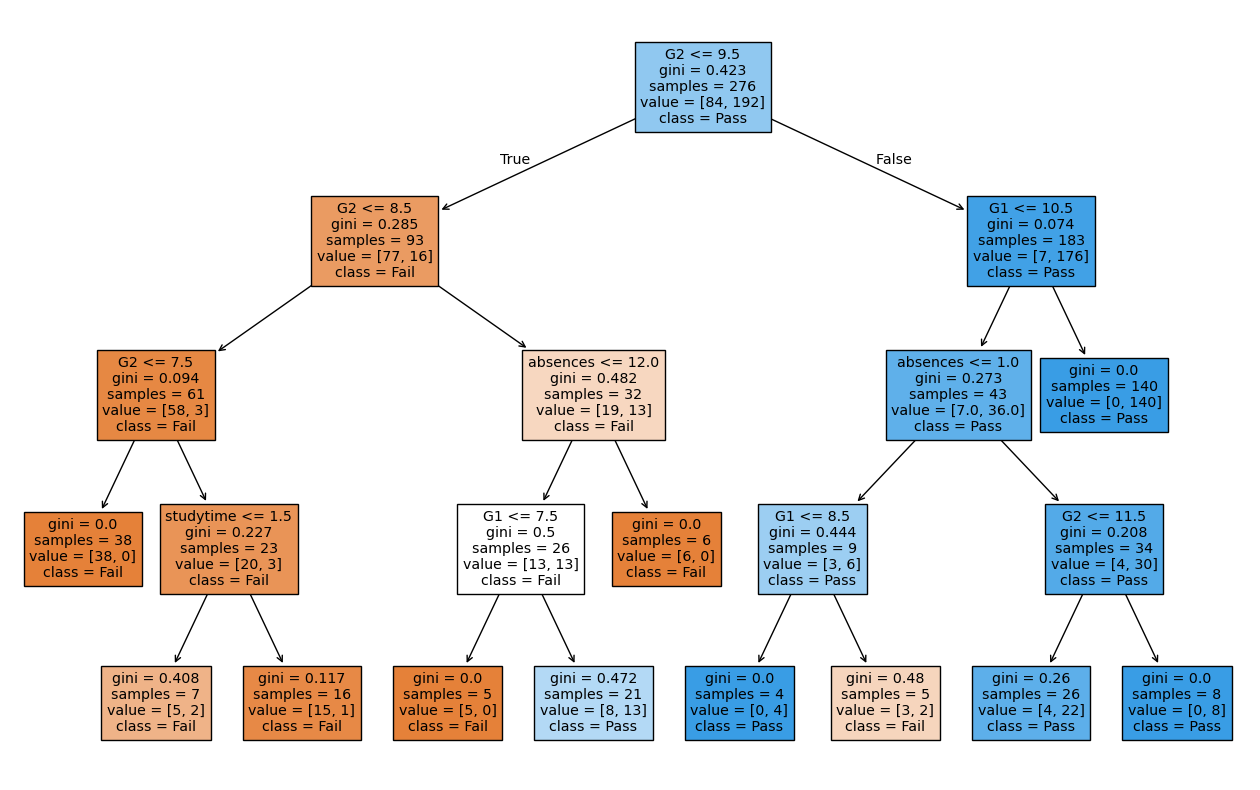

In [11]:
plt.figure(figsize=(16,10))
plot_tree(model, feature_names=X.columns, class_names=["Fail", "Pass"], filled=True)
plt.show()

In [12]:
importances = model.feature_importances_
feature_names = X.columns 

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n")
print(feature_importance_df)


Feature Importance:

     Feature  Importance
4         G2    0.892292
3         G1    0.069187
2   absences    0.033306
0  studytime    0.005214
1   failures    0.000000


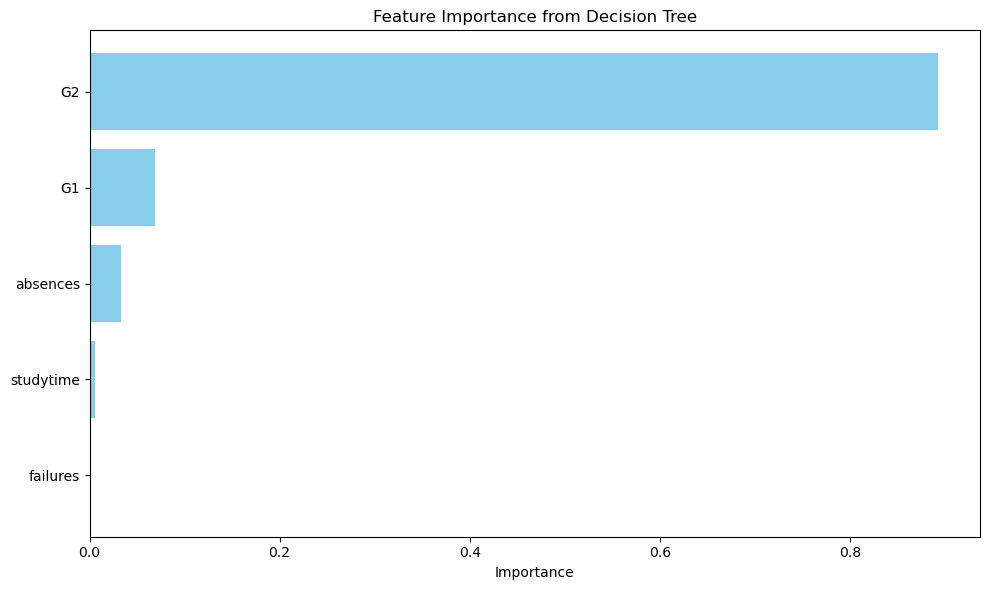

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
model = DecisionTreeClassifier(
    max_depth=4,               
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8823529411764706

Confusion Matrix:
 [[36 10]
 [ 4 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        46
           1       0.87      0.95      0.91        73

    accuracy                           0.88       119
   macro avg       0.89      0.86      0.87       119
weighted avg       0.88      0.88      0.88       119

